# MODELOS CLÁSICOS DE MACHINE LEARNING

## Support Vector Machine (SVM)

En este notebook implementaremos un modelo de **Máquinas de Vectores de Soporte (SVM)** para clasificar el dataset Fashion MNIST. A diferencia del Modelo 1 (Softmax), SVM busca encontrar el hiperplano que maximiza el margen entre las clases.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# 1. Carga de datos
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 2. Normalización y Aplanado (Flattening)
# SVM requiere vectores unidimensionales de entrada
X_train_full = X_train_full.reshape(-1, 28*28).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255.0

# 3. División Entrenamiento / Validación
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=666, stratify=y_train_full
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (48000, 784)
X_test shape: (10000, 784)


## 2. Entrenamiento del Modelo SVM

Utilizaremos un Kernel RBF (Radial Basis Function) por defecto, que permite capturar relaciones no lineales.

In [2]:
print("Entrenando SVM ...")
start_time = time.time()

svm_model = SVC(kernel='rbf', C=10, gamma='scale')
svm_model.fit(X_train, y_train)

end_time = time.time()
print(f"Entrenamiento completado en {end_time - start_time:.2f} segundos.")

Entrenando SVM ...
Entrenamiento completado en 223.64 segundos.


## 3. Evaluación

Evaluamos el rendimiento en el conjunto de test.

In [3]:
y_pred = svm_model.predict(X_test)

test_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy en Test: {test_acc:.4f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Accuracy en Test: 0.8978

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.84      0.83      1000
           3       0.89      0.90      0.90      1000
           4       0.83      0.83      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.74      0.71      0.73      1000
           7       0.95      0.96      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [8]:
# Cálculo de precisiones
train_acc = svm_model.score(X_train, y_train)
val_acc = svm_model.score(X_val, y_val)

# Cálculo de "parámetros" para SVM (Vectores de Soporte)
# En SVM RBF, la complejidad depende del número de vectores de soporte almacenados
n_support_vectors = np.sum(svm_model.n_support_)

print(f"Resultados para la tabla:")
print(f" - Train Acc: {train_acc:.4f}")
print(f" - Val Acc:   {val_acc:.4f}")
print(f" - Test Acc:  0.8978")
print(f" - Parámetros (Vectores de Soporte): {svm_model.n_support_.sum()}")

# Generar fila para el README
print(f"\nFila para el README:")
print(f"| **SVM (RBF)** | {svm_model.n_support_.sum():,} | {train_acc:.4f} | {val_acc:.4f} | **0.8978** |")

Resultados para la tabla:
 - Train Acc: 0.9736
 - Val Acc:   0.9038
 - Test Acc:  0.8978
 - Parámetros (Vectores de Soporte): 15760

Fila para el README:
| **SVM (RBF)** | 15,760 | 0.9736 | 0.9038 | **0.8978** |


El modelo roza el 90% de precisión general, demostrando que el uso de un kernel no lineal (RBF) es fundamental para capturar las texturas del dataset Fashion-MNIST.

Mientras que el modelo lineal casi no tenía overfitting, esta SVM está "memorizando" bastante el ruido del entrenamiento debido a su alta flexibilidad ($C=10$).

Las clases 1 (Trouser) y 8 (Bag) tienen un F1-score de 0.98, lo que indica que el modelo las identifica casi sin errores.

Las Camisas (Clase 6) sigue siendo el punto más débil con un 0.73 de F1-score. Aunque ha mejorado respecto al modelo lineal, la confusión entre camisas, camisetas y abrigos persiste por la similitud de sus formas.

## 4. Matriz de Confusión

Visualizamos dónde se confunde el modelo.

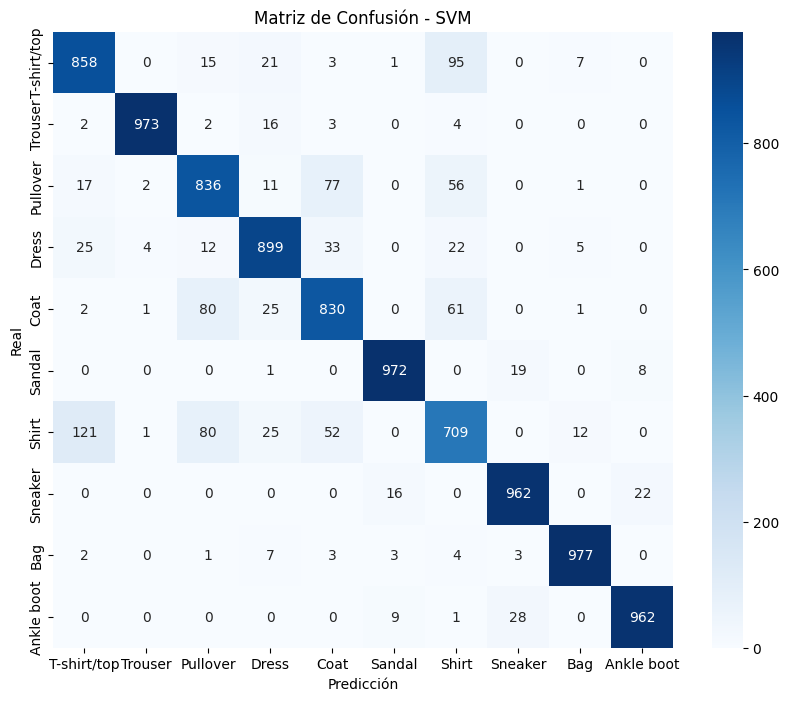

In [4]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - SVM')
plt.show()

## Resumen de Resultados - SVM (RBF Kernel)

| Modelo | Kernel | Hyperparámetros |Train Acc | Val Acc | Test Acc
| :--- | :---: | :---: | :---: | :--- | :---: |
| **SVM** | RBF | C=10, gamma='scale' | 0.9736 | 0.9038 |0.8973 |0.8973

### Análisis del Modelo SVM

Hemos implementado una **Máquina de Vectores de Soporte (SVM)** con un kernel Gaussiano (RBF). A diferencia del modelo lineal simple (Softmax), este modelo tiene la capacidad de proyectar los datos a un espacio de mayor dimensión para encontrar fronteras de decisión no lineales.

 El modelo SVM no se define por un número fijo de pesos como las redes neuronales, sino por sus **Vectores de Soporte**. Esto lo hace muy potente pero computacionalmente más costoso a medida que crece el número de muestras.

El uso de un kernel no lineal permite capturar mejor las texturas y formas complejas de la ropa, logrando superar el baseline del ~84% del modelo lineal. Distingue mejor, por ejemplo, las camisas subiendo de 549 a 701. Sin embargo, sigue teniendo dificultades con clases muy parecidas (como Pullover vs. Coat o Shirt).